# Bank Loan Status Prediction Using Machine Learning

The goal of this project is to create a model using machine learning with the aim of accurately predicting whether a loan will be paid or charged off

Additionally, an exploratory data analysis will be conducted to uncover key insights into the clients' data and indentify patterns that will help the bank reduce risks when giving out loans

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Creating functions for future use

In [2]:
def all_values(df):
    # Getting the amount of the null values in each column 
    df_all_values = pd.DataFrame(df.isnull().sum())
    
    # Resetting the index
    df_all_values.reset_index(inplace=True)
    
    # Adding column names
    df_all_values.columns = ['Column', 'Null_Values']
    
    # Adding amount of non-null values
    non_null_values = pd.DataFrame(df.notnull().sum())
    non_null_values.reset_index(inplace=True)
    df_all_values.insert(1, 'Non_Null_Values', non_null_values[0])
    
    # Calculating the percentage of null values 
    df_null_value_percentage = df.isnull().sum() / len(df) * 100
    df_null_value_percentage = pd.DataFrame(df_null_value_percentage)
    df_null_value_percentage.reset_index(inplace=True)
    df_all_values['Null_Value_Percentage'] = df_null_value_percentage[0]
    
    # Adding the total amount of values
    df_all_values['Total_Values'] = df_all_values['Null_Values'] + df_all_values['Non_Null_Values']
    
    return df_all_values

## Importing the Dataset

In [3]:
df = pd.read_csv('/Users/admin/Downloads/credit_train.csv')

## Column description:

**Loan ID** - Unique loan ID

**Customer ID** - Unique customer ID

**Loan Status** - Whether a loan is "Fully Paid" or "Charged Off"

**Current Loan Amount** - The initial amount of the loan

**Term** - The term of the loan, either "Short Term" or "Long Term"

**Credit Score** - The client's credit score, ranging from 300-850

**Years in current job** - How many years a client has been at their current job

**Home Ownership** - Whether a client rent, has a mortgage, or owns their home

**Annual Income** - Client's annual income

**Purpose** - Purpose of the loan

**Monthly Debt** - The monthly payment the client owes the bank

**Years of Credit History** - How many years the client has had a credit history

**Months since last delinquent** - How many months since the client last broke the terms of their loan, i.e. late payment

**Number of Open Accounts** - Number of credit cards the client has with the bank

**Number of Credit Problems** - Number of credit problems in the client's history

**Current Credit Balance** - How much the client currently owes the bank

**Maximum Open Credit** - The maximum amount of credit the client is allowed from any/all sources combined

**Bankruptcies** - Number of bankruptcies the client has had

**Tax Liens** - Number of tax liens the client has had

# Initial overview of Datasets

In [4]:
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan ID,100000,514,0.511372,100514
1,Customer ID,100000,514,0.511372,100514
2,Loan Status,100000,514,0.511372,100514
3,Current Loan Amount,100000,514,0.511372,100514
4,Term,100000,514,0.511372,100514
5,Credit Score,80846,19668,19.567423,100514
6,Annual Income,80846,19668,19.567423,100514
7,Years in current job,95778,4736,4.711781,100514
8,Home Ownership,100000,514,0.511372,100514
9,Purpose,100000,514,0.511372,100514


In [5]:
df.shape

(100514, 19)

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


From the overview of the data, the **Credit_Score** and **Months_since_last_delinquent** immediately stand out

The first has impossible values since credit scores are calculated within the 300-850 range, so the abnormaly high values could be data input errors 

The issue with the second is that more than 50% of rows contain null values, making the column a prime candidate for removal

The **Credit_Score** and **Annual_Income** columns also contain a relatively large amount of null values, however, those can be filled since the overall amount of said null values is much smaller and other columns can be used to guide decision making when choosing how to fill them

Other issues may be present, but I will cover them during the exploratory data analysis

#  Data cleaning and exploratory data analysis

Within the exploratory data analysis, the main goal will be to uncover paterns and key insights that can lead to reducing the bank's risks when giving out loans. The main goals will be:

1 - Finding loan amounts that pose the most/least risk

2 - Finding the types of loans that pose the most/least risk

3 - Finding out how much the clients' credit score influences the loan status

In addition, if some patterns or insights not covered by the list above are found, they will be explored in equal measure

### Replacing spaces in column names 

Replacing spaces in column names with underscores solely for ease of use down the line

In [7]:
df.rename(columns= {i:i.replace(' ', '_') for i in df.columns}, inplace=True)

### Removing rows with all columns being null values

In [8]:
df.dropna(axis='index', how='all', inplace=True)
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,100000,0,0.000,100000
1,Customer_ID,100000,0,0.000,100000
2,Loan_Status,100000,0,0.000,100000
3,Current_Loan_Amount,100000,0,0.000,100000
4,Term,100000,0,0.000,100000
5,Credit_Score,80846,19154,19.154,100000
6,Annual_Income,80846,19154,19.154,100000
7,Years_in_current_job,95778,4222,4.222,100000
8,Home_Ownership,100000,0,0.000,100000
9,Purpose,100000,0,0.000,100000


The toal amount of rows in the dataset went down from **100514** to **100000**, so we can move on to dealing with the actual data

### Checking and removing duplicate rows 

In [9]:
df['Loan_ID'].value_counts()

14dd8831-6af5-400b-83ec-68e61888a048    2
1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e    2
111602d9-f958-403d-a9d5-4fba630297eb    2
1076b681-b8ff-463f-a7af-576e12edd637    2
f7817002-4e22-4462-8abc-402eb4ceaa6c    2
                                       ..
6c4cac03-f896-4e4c-8503-6c91d83b145b    1
73e806fa-000a-4d7a-ab65-de1b62339427    1
b14a15a8-4d95-4473-9288-77a2b4b486d5    1
c6101fbe-52f3-41b7-b6a1-b062b5f3ad70    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: Loan_ID, Length: 81999, dtype: int64

As we can see, there are duplicate values in the **Loan_ID** column, which is supposed to only contain unique values

By first removing all absolute duplicate rows (values in all columns are identical) we will be able to tell whether there are columns where only the **Loan_ID** is duplicated and the other values are unique

In [10]:
df.drop_duplicates(inplace=True) # Removes only absolute duplicates since no column is specified
df['Loan_ID'].value_counts()

387f3adf-a02d-4063-be16-6c9a2b4cf425    2
c55756d0-0b63-45fc-b2b8-c1e1d1be4f18    2
02ed9cc4-6c77-4fed-987f-9dd7f665c79b    2
4b4b7567-6709-4d12-9e2c-92d02a003a3e    2
b8e5b109-4d84-46f6-999a-5b96f55b0811    2
                                       ..
d27a4ea5-5b97-4f38-991a-b711a27c848f    1
b6836927-4342-47e1-ad3b-6aa45bd434c4    1
a64891b6-f30d-4480-93e9-05bf5d191e64    1
24b7ae15-8aab-49f0-8d40-ba5a9238be6f    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: Loan_ID, Length: 81999, dtype: int64

In [11]:
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,89785,0,0.000000,89785
1,Customer_ID,89785,0,0.000000,89785
2,Loan_Status,89785,0,0.000000,89785
3,Current_Loan_Amount,89785,0,0.000000,89785
4,Term,89785,0,0.000000,89785
5,Credit_Score,70631,19154,21.333185,89785
6,Annual_Income,70631,19154,21.333185,89785
7,Years_in_current_job,85983,3802,4.234560,89785
8,Home_Ownership,89785,0,0.000000,89785
9,Purpose,89785,0,0.000000,89785


The amount of unique values Loan_ID hasn't changed, yet the overall number of rows in the dataset has dropped from **100000** to **89785**, with some duplicates in Loan_ID still remaining

This requires further investigation

In [12]:
df.loc[(df['Loan_ID'] == '32200a7e-c65e-4e5e-9878-1161d256bcfe') |
        (df['Loan_ID'] == '387f3adf-a02d-4063-be16-6c9a2b4cf425') |
        (df['Loan_ID'] == '412394d9-b450-42dc-9b2f-3956948df8b6')] 

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
180,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,234806.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
289,412394d9-b450-42dc-9b2f-3956948df8b6,1dc24b5e-f322-469b-a154-a15fea750baf,Fully Paid,277948.0,Short Term,707.0,1118948.0,10+ years,Rent,Debt Consolidation,29465.58,15.7,63.0,11.0,1.0,66994.0,129294.0,1.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
2857,412394d9-b450-42dc-9b2f-3956948df8b6,1dc24b5e-f322-469b-a154-a15fea750baf,Fully Paid,99999999.0,Short Term,707.0,1118948.0,10+ years,Rent,Debt Consolidation,29465.58,15.7,63.0,11.0,1.0,66994.0,129294.0,1.0,0.0
12241,387f3adf-a02d-4063-be16-6c9a2b4cf425,8febb4c1-83a3-4391-a988-e2fe6a947be0,Fully Paid,198836.0,Short Term,NaN,NaN,NaN,Home Mortgage,other,17644.16,40.7,15.0,18.0,0.0,4745250.0,10923462.0,0.0,0.0
21968,387f3adf-a02d-4063-be16-6c9a2b4cf425,8febb4c1-83a3-4391-a988-e2fe6a947be0,Fully Paid,198836.0,Short Term,703.0,1245469.0,NaN,Home Mortgage,other,17644.16,40.7,15.0,18.0,0.0,4745250.0,10923462.0,0.0,0.0


While checking some of the duplicate rows after removing the absolute duplicates, 3 columns stand out as the main difference between the "original" and the duplicate rows: **Current_Loan_Amount**, **Credit_Score**, and **Annual_Income**

The **Current_Loan_Amount** column being included in the list may seem odd, however, I chose it due to it being an impossible amount, considering that it is several magnitudes higher than the **Maximum_Open_Credit**


In [13]:
# Dropping all duplicate rows with anomalies in ['Current_Loan_Amount']
# The values are sorted since the sort is ascending and the .duplicated() function keeps the first instance-
# -of a row it encounters, thus leaving only the unwanted duplicates
df.drop(df.sort_values(by=['Current_Loan_Amount']).loc[df[['Loan_ID', 'Annual_Income', 'Credit_Score'] 
                                                         ].duplicated()].index, axis = 0, inplace=True)

# Same principle, except that despite the sort being ascending, NaN values are sent towards the end by default
df.drop(df.sort_values(by=['Credit_Score']).loc[df['Loan_ID'].duplicated()].index, axis = 0, inplace=True)

df.loc[df['Loan_ID'].duplicated()] # As we can see, there are no duplicates left

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens


While checking the duplicated rows, I discovered that **Credit_Score** and **Annual_Income** were linked in terms of null values - either they both had them or neither of them did, so there was no need to perform the drop an additional time


In [14]:
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,81999,0,0.000000,81999
1,Customer_ID,81999,0,0.000000,81999
2,Loan_Status,81999,0,0.000000,81999
3,Current_Loan_Amount,81999,0,0.000000,81999
4,Term,81999,0,0.000000,81999
5,Credit_Score,64968,17031,20.769765,81999
6,Annual_Income,64968,17031,20.769765,81999
7,Years_in_current_job,78491,3508,4.278101,81999
8,Home_Ownership,81999,0,0.000000,81999
9,Purpose,81999,0,0.000000,81999


After removing all of the duplicates, there are **81999** rows left, meaning that duplicates made up close to **18%** of the initial dataset

### Target feature analysis

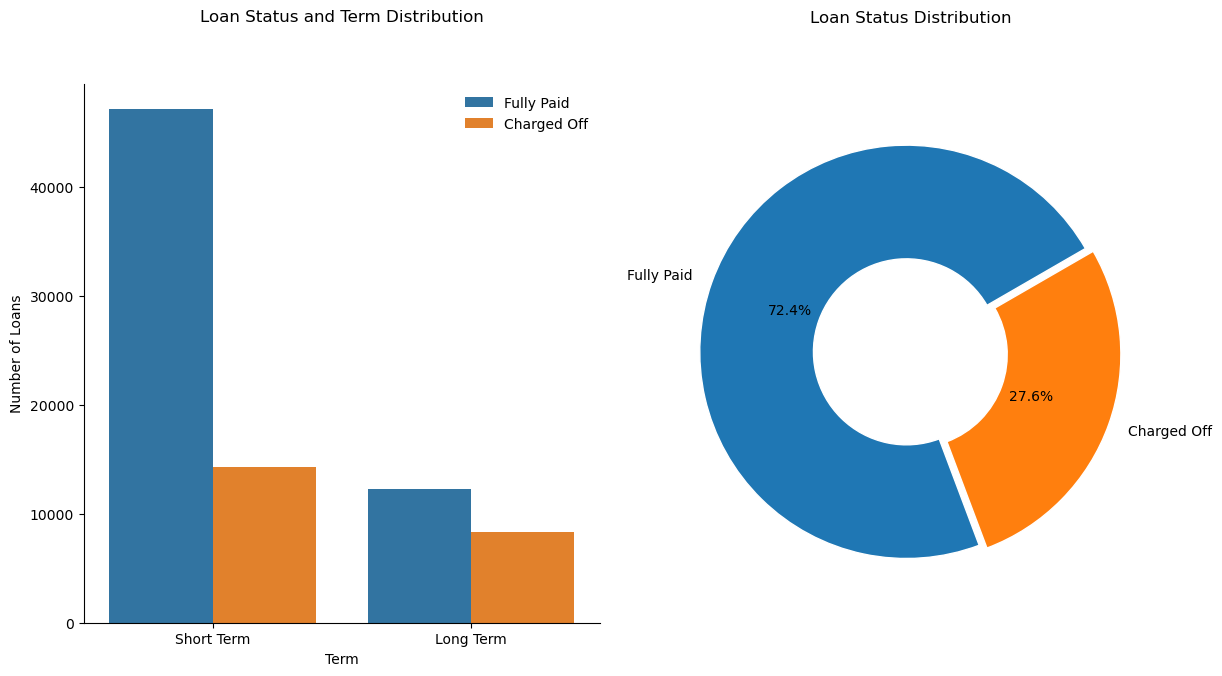

In [15]:
plt.figure(figsize=(12, 7))

plt.subplot(121)
sns.countplot(df["Term"],hue=df["Loan_Status"])
sns.despine(right = True, top = True)
plt.legend().get_frame().set_linewidth(0.0)
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.title('Loan Status and Term Distribution', y=1.1)
    
plt.subplot(122)
df["Loan_Status"].value_counts().plot.pie(autopct = '%1.1f%%',figsize =(14, 7),explode=(0.02,0.02),
                                           startangle=30, wedgeprops=dict(width=0.55, edgecolor='w'))
plt.ylabel('')
plt.title('Loan Status Distribution', y=1.1249)
plt.subplots_adjust(wspace=0.1)

plt.rc('font', size=12)

plt.show()

As we can see, **72.4%** of loans are **fully paid** with the overwhelming majority of loans being **short term** ones

However, what is interesting is that **long term loans pose much greater risks for the bank**, as the ratio of fully paid to charged off loans in the long term category is much closer than that of short term loans

## Dealing with null values and anomalies

### Dealing with null values in ['Months_since_last_delinquent']

With more than 50% of values in **Months_since_last_delinquent** being null values, there are 2 possible explanations:

1 - Bad data/input errors: in this case, the column should be dropped as substituting the values for random ones would lead to very unreliable data

2 - Unexplainable values within the context of the feature: since the data is in months, starting from 0, the scope of the feature cannot account for customers who have yet to commit a delinquency and, hence, such cases are represented by null values

The second explanation seems more likely due to 2 factors: the scope of the feature and that it would be reasonable to assume that more than half of the customers don't miss their payments 

As such, instead of dropping the feature completely, my goal is to either transform it in a way that can reflect customers not having missed any payments or to create a new feature that shows whether there has been any delinquency in the past, or even both

This will later be tested during the model fitting stage by trying them with and without the feature(s) and seeing whether it has any positive/negative impact on their performance

In [16]:
df.insert(12, 'History_of_delinquency', 1)
df.loc[df['Months_since_last_delinquent'].isnull(), 'History_of_delinquency'] = 0
df[['Months_since_last_delinquent', 'History_of_delinquency']]

,Months_since_last_delinquent,History_of_delinquency
0,NaN,0
1,8.0,1
2,29.0,1
3,NaN,0
4,NaN,0
...,...,...
99990,16.0,1
99996,21.0,1
99997,18.0,1
99998,NaN,0


Created a new feature called **History_of_delinquency** to show whether there were any cases of delinquency in the past, as having a non-null value in **Months_since_last_delinquent** would imply there being at least one occurence 

In [17]:
df.loc[df['Months_since_last_delinquent'].isnull(), 'Months_since_last_delinquent'] = \
    df['Years_of_Credit_History'] * 12
df[['History_of_delinquency', 'Months_since_last_delinquent', 'Years_of_Credit_History']]

,History_of_delinquency,Months_since_last_delinquent,Years_of_Credit_History
0,0,206.4,17.2
1,1,8.0,21.1
2,1,29.0,14.9
3,0,144.0,12.0
4,0,73.2,6.1
...,...,...,...
99990,1,16.0,20.1
99996,1,21.0,9.4
99997,1,18.0,18.8
99998,0,180.0,15.0


In [18]:
df['History_of_delinquency'].value_counts()

0    44621
1    37378
Name: History_of_delinquency, dtype: int64

To fill the null values in **Months_since_last_delinquent**, I simply took the values from **Years_of_Credit_History** and multiplied them by 12 to convert years to months

I chose this approach under the assumption that a delinquency cannot occur without a loan, and that as soon as the customer's first loan is taken out, it starts their credit history

Thus, if a customer hasn't commited a delinquency, the potential maximum amount of **Months_since_last_delinquent** would equal their **Years_of_Credit_History**

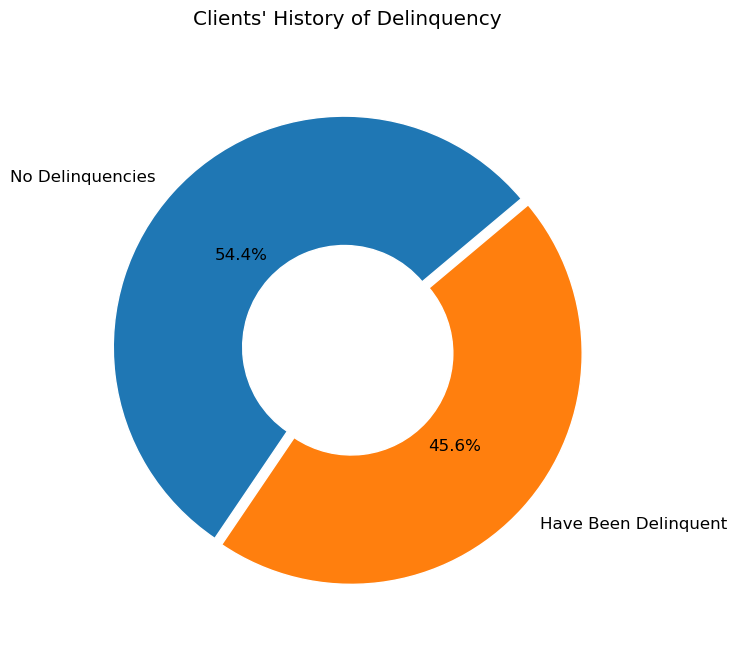

In [19]:
df["History_of_delinquency"].value_counts().plot.pie(
    autopct = '%1.1f%%',figsize =(7.5, 7.5),explode=(0.02,0.02), labels=['No Delinquencies', 'Have Been Delinquent'],
    startangle=40, wedgeprops=dict(width=0.56, edgecolor='w'))

plt.title("Clients' History of Delinquency", y=1.05)
plt.subplots_adjust(wspace=0.1)

plt.ylabel('')
plt.rc('font', size=12)

plt.show()

A little over half of the clients have never been delinquent when it comes to their monthly payments, which is relatively within the norm 

### Dealing with anomalies in ['Current_Loan_Amount'] and ['Maximum_Open_Credit']

In [20]:
df['Current_Loan_Amount'].value_counts()

99999999.0    9688
223322.0        23
214962.0        22
270226.0        21
177452.0        21
              ... 
39622.0          1
185372.0         1
413578.0         1
329296.0         1
274076.0         1
Name: Current_Loan_Amount, Length: 21821, dtype: int64

In [21]:
df['Current_Loan_Amount'].describe()

count    8.199900e+04
mean     1.208640e+07
std      3.217953e+07
min      1.080200e+04
25%      1.792560e+05
50%      3.077800e+05
75%      5.194530e+05
max      1.000000e+08
Name: Current_Loan_Amount, dtype: float64

In [22]:
df['Maximum_Open_Credit'].describe()

count    8.199700e+04
mean     7.935358e+05
std      9.208747e+06
min      0.000000e+00
25%      2.804560e+05
50%      4.777740e+05
75%      7.984900e+05
max      1.539738e+09
Name: Maximum_Open_Credit, dtype: float64

There seems to be an anomaly in **Current_Loan_Amount**, as the value **99999999.0** greatly outnumbers all other values in both magnitude and number of occurences, more specifically, it is encountered more than **421** times more often than the second most prevalent value  

Addditionally, the mean of **Current_Loan_Amount** is significantly higher than that of **Maximum_Open_Credit**, meaning that the issue might lie in the loan amounts being bigger than the maximum credit, which should be impossible 

Lastly, the minimum value of **Maximum_Open_Credit** is **0**, while it is not so for **Current_Loan_Amount**, which also points to another anomaly, since there could be no loan in the first place in that case

In [23]:
df.loc[df['Current_Loan_Amount'] > df['Maximum_Open_Credit'], 'Current_Loan_Amount'].value_counts()

99999999.0    9688
325578.0         7
433136.0         7
449988.0         7
267872.0         7
              ... 
413622.0         1
565136.0         1
616000.0         1
375188.0         1
242682.0         1
Name: Current_Loan_Amount, Length: 10140, dtype: int64

As suspected, all of the **99999999.0** values exceed the maximum open credit, meaning that they need to be either changed or removed

Since they currently make up more than 10% of the dataset, removing them could negatively affect the model's accuracy.

However, the issue may be more complex, wherein the maximum open credit could also be equal to 0, and since I plan to change the **Current_Loan_Amount** anomalies to their respective **Maximum_Open_Credit**, the latter will need to be changed first

In [24]:
# Find all Maximum_Open_Credit == 0
# In the same row, find the loan amount that != 99999999.0
# Replace those Maximum_Open_Credit with the median of rows that have the max credit higher than the found loan amount

zero_credit_loans = df.loc[(df['Maximum_Open_Credit'] == 0) & 
    (df['Current_Loan_Amount'] != 99_999_999.0), 'Current_Loan_Amount'].unique().tolist()

counter = 0
while counter < len(zero_credit_loans):
    df.loc[(df['Maximum_Open_Credit'] == 0) & 
           (df['Current_Loan_Amount'] == zero_credit_loans[counter]),
           'Maximum_Open_Credit'] = \
        df.loc[df['Maximum_Open_Credit'] > zero_credit_loans[counter], 'Maximum_Open_Credit'].median()
    counter += 1

df.loc[(df['Maximum_Open_Credit'] == 0), 'Current_Loan_Amount'].value_counts()

99999999.0    79
Name: Current_Loan_Amount, dtype: int64

Now, the only rows where **Maximum_Open_Credit** is equal to 0 are those with **Current_Loan_Amount** being equal to **99999999.0**

I decided to change those separately since I plan to change them to the median across the entire dataset

In [25]:
df.loc[(df['Maximum_Open_Credit'] == 0) & (df['Current_Loan_Amount'] == 99_999_999.0), 'Maximum_Open_Credit'] = \
df['Maximum_Open_Credit'].median()

df['Maximum_Open_Credit'].fillna(value=df['Maximum_Open_Credit'].median(), inplace=True)

Anomalies in **Maximum_Open_Credit** have been dealt with, so now onto changing cases where **Current_Loan_Amount** > **Maximum_Open_Credit**

Additionally, there were 2 rows with null values in **Maximum_Open_Credit**, so those were filled as well

In [26]:
df.loc[df['Current_Loan_Amount'] > df['Maximum_Open_Credit'], 'Current_Loan_Amount'] = df['Maximum_Open_Credit']

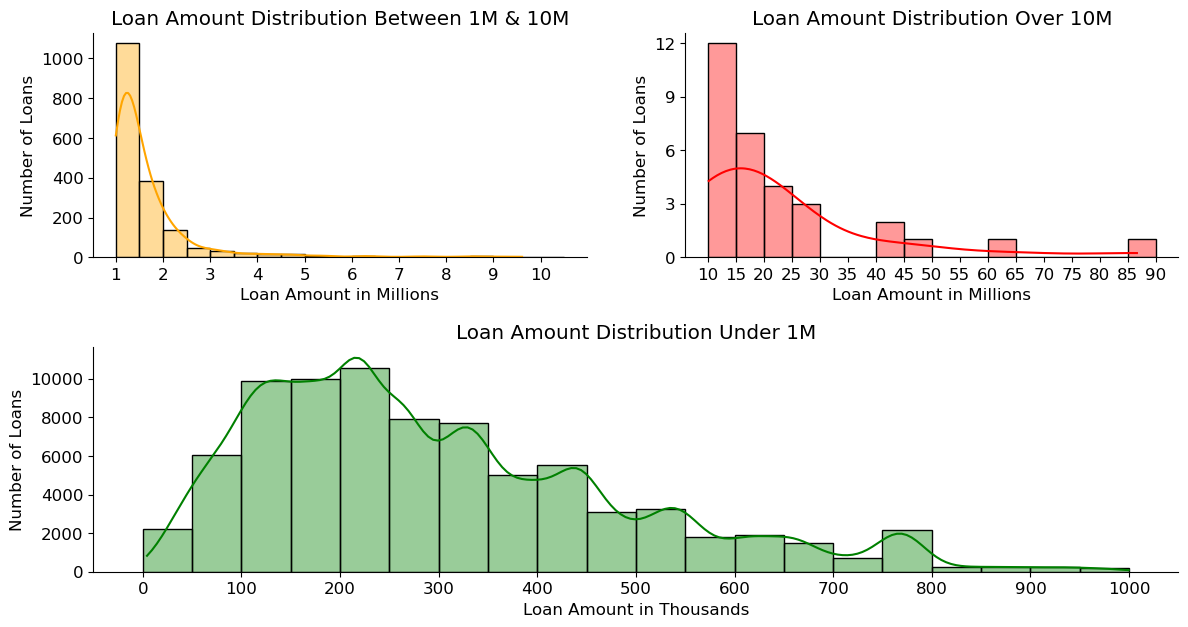

In [27]:
plt.figure(figsize = (14, 7))

plt.subplot(2,2,1)
sns.histplot(data = (df.loc[(df['Current_Loan_Amount'] >= 1_000_000) & (df['Current_Loan_Amount'] <= 10_000_000),
                    'Current_Loan_Amount'] / 1_000_000),bins=np.arange(1,11,0.5), color = 'orange', 
                     alpha=0.4, kde=True)

sns.despine(right = True, top = True)
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount in Millions')
plt.xticks(np.arange(1,11,1))
plt.title('Loan Amount Distribution Between 1M & 10M')

plt.subplot(2,2,2)
sns.histplot(data = (df.loc[df['Current_Loan_Amount'] > 10_000_000, 'Current_Loan_Amount'] / 1_000_000),
             bins=np.arange(10,91,5), color = 'red', alpha=0.4, kde=True)

sns.despine(right = True, top = True)
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount in Millions')
plt.xticks(np.arange(10,91,5))
plt.yticks(np.arange(0,13,3))
plt.title('Loan Amount Distribution Over 10M')

plt.subplot(2,1,2)
sns.histplot(data = (df.loc[df['Current_Loan_Amount'] <= 1_000_000, 'Current_Loan_Amount'] / 1000),
             bins=np.arange(0,1001,50), color = 'green', alpha=0.4, kde=True)

sns.despine(right = True, top = True)
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount in Thousands')
plt.xticks(np.arange(0,1001,100))
plt.title('Loan Amount Distribution Under 1M')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

Judging from the data, **most clients take loans under 2.5 million**. After that point, there is a severe dropoff in the number of loans and a much larger difference in the amounts, which is to be expected

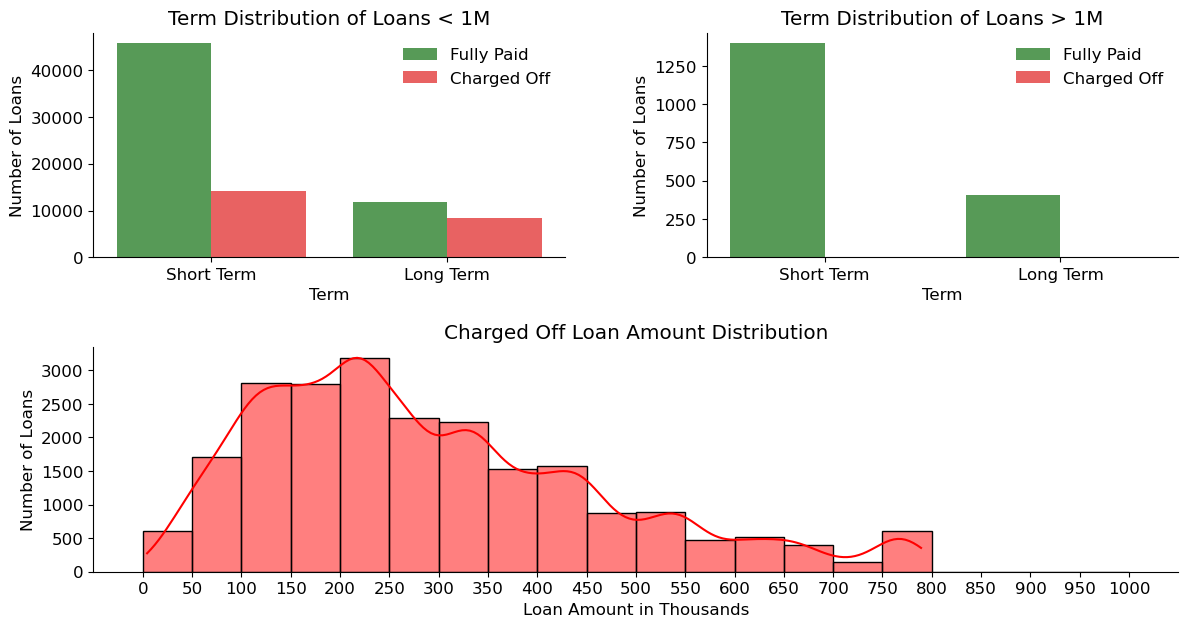

In [28]:
palette = {'Fully Paid' : 'green',
           'Charged Off': 'red'}

plt.figure(figsize=(14, 7))

plt.subplot(2,2,1)

sns.countplot(df.loc[df['Current_Loan_Amount'] <= 1_000_000, "Term"], order=['Short Term', 'Long Term'],
              hue=df['Loan_Status'], palette=palette, alpha=0.7)

sns.despine(right = True, top = True)
plt.legend().get_frame().set_linewidth(0.0)
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.title('Term Distribution of Loans < 1M')

plt.subplot(2,2,2)

sns.countplot(df.loc[df['Current_Loan_Amount'] > 1_000_000, "Term"], order=['Short Term', 'Long Term'],
              hue=df['Loan_Status'], palette=palette, alpha=0.7)

sns.despine(right = True, top = True)
plt.legend().get_frame().set_linewidth(0.0)
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.title('Term Distribution of Loans > 1M')

plt.subplot(2,1,2)

sns.histplot(data=(df.loc[df['Loan_Status'] == 'Charged Off', "Current_Loan_Amount"] / 1000), 
             bins=np.arange(0,1001,50), color = 'red', alpha=0.5, kde=True)

sns.despine(right = True, top = True)
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount in Thousands')
plt.xticks(np.arange(0,1001,50))
plt.title('Charged Off Loan Amount Distribution')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.rc('font', size=11)

plt.show()

More than 75% of loans over 1 million are short term loans, which is in line with the overall loan distribution

However, surprisingly, **every single loan over 1 million has been fully paid**, meaning that this group poses by far the least risk for the bank based on the given data

What was also equally as surprising is that the **distribution of charged off loans almost perfectly mirrored the proportions of the distribution of loans under 1 million**

As for the loans that pose the most risk, loans that fall in the **100K to 350K category** have the highest concentration of charged off loans, with a decline in number between 350K and 450K, after which an even more severe decline after that

### Dealing with anomalies in ['Current_Credit_Balance']

In [29]:
len(df.loc[df['Current_Credit_Balance'] > df['Maximum_Open_Credit'], 'Current_Credit_Balance'].to_list())

39

Currently, there are **39** rows where **Current_Credit_Balance** exceeds **Maximum_Open_Credit**, which, again, should not be possible under normal circumstances

As knowing a client's **Current_Credit_Balance** is more important than their **Maximum_Open_Credit**, the latter will be changed to the former so that the two values don't contradict each other

In [30]:
df.loc[df['Current_Credit_Balance'] > df['Maximum_Open_Credit'], 'Current_Credit_Balance'] = df['Maximum_Open_Credit']

len(df.loc[df['Current_Credit_Balance'] > df['Maximum_Open_Credit'], 'Current_Credit_Balance'].to_list())

0

### Dealing with anomalies and null values in ['Credit_Score']

In [31]:
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,81999,0,0.000000,81999
1,Customer_ID,81999,0,0.000000,81999
2,Loan_Status,81999,0,0.000000,81999
3,Current_Loan_Amount,81999,0,0.000000,81999
4,Term,81999,0,0.000000,81999
5,Credit_Score,64968,17031,20.769765,81999
6,Annual_Income,64968,17031,20.769765,81999
7,Years_in_current_job,78491,3508,4.278101,81999
8,Home_Ownership,81999,0,0.000000,81999
9,Purpose,81999,0,0.000000,81999


In [32]:
df['Years_of_Credit_History'].describe()

count    81999.000000
mean        18.296783
std          7.043774
min          3.600000
25%         13.500000
50%         17.000000
75%         21.800000
max         70.500000
Name: Years_of_Credit_History, dtype: float64

Since the minimum value in **Years_of_Credit_History** is 3.6, it would be reasonable to assume that there aren't any cases of clients without a credit score.

As such, all null values in **Credit_Score** will need to be filled with a number between 300-850 (the standard credit score scale)

But first, anomalies in the present values should be taken care of, to be precise, those where **Credit_Score** > 850

In [33]:
df.loc[df['Credit_Score'] > 850, 'Credit_Score'].describe()

count    4551.000000
mean     7108.989233
std       306.627221
min      5850.000000
25%      6950.000000
50%      7190.000000
75%      7350.000000
max      7510.000000
Name: Credit_Score, dtype: float64

In [34]:
df.loc[(df['Credit_Score'] > 850) & (df['Credit_Score'] % 10 != 0), 'Credit_Score'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Credit_Score, dtype: float64

Judging from the values present here, the anomalies seem to be input errors, wherein a zero has been added to the end of the value

As such, simply removing the zero by dividing by 10 would solve the issue

In [35]:
df.loc[df['Credit_Score'] > 850, 'Credit_Score'] = df['Credit_Score'] / 10

df['Credit_Score'].describe()

count    64968.000000
mean       720.225342
std         27.790618
min        585.000000
25%        708.000000
50%        728.000000
75%        741.000000
max        751.000000
Name: Credit_Score, dtype: float64

Now onto filling the missing values

In [36]:
med = df['Credit_Score'].median()

# Filling missing values with a random range based on the median
df['Credit_Score'].fillna(value=np.random.randint(low=(med-30), high=(med+30)), inplace=True)
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,81999,0,0.000000,81999
1,Customer_ID,81999,0,0.000000,81999
2,Loan_Status,81999,0,0.000000,81999
3,Current_Loan_Amount,81999,0,0.000000,81999
4,Term,81999,0,0.000000,81999
5,Credit_Score,81999,0,0.000000,81999
6,Annual_Income,64968,17031,20.769765,81999
7,Years_in_current_job,78491,3508,4.278101,81999
8,Home_Ownership,81999,0,0.000000,81999
9,Purpose,81999,0,0.000000,81999


### Creating feature for ['Credit_Score'] categorisation

In [37]:
# Inserting new feture and filling it with values in ['Credit_Score']
df.insert(6, 'Credit_Range', df['Credit_Score'])

# Creating dictionary with credit categories for each credit score range
ranges = {range(300, 581) : 'Poor',
          range(581,671) : 'Fair',
          range(671,741) : 'Good',
          range(741,801) : 'Very Good',
          range(801, 851) : 'Excellent'}

# Replacing each credit score in the new feature with its respective category
df.replace({'Credit_Range' : ranges}, inplace=True)

df['Credit_Range'].value_counts()

Good         43951
Very Good    33667
Fair          4381
Name: Credit_Range, dtype: int64

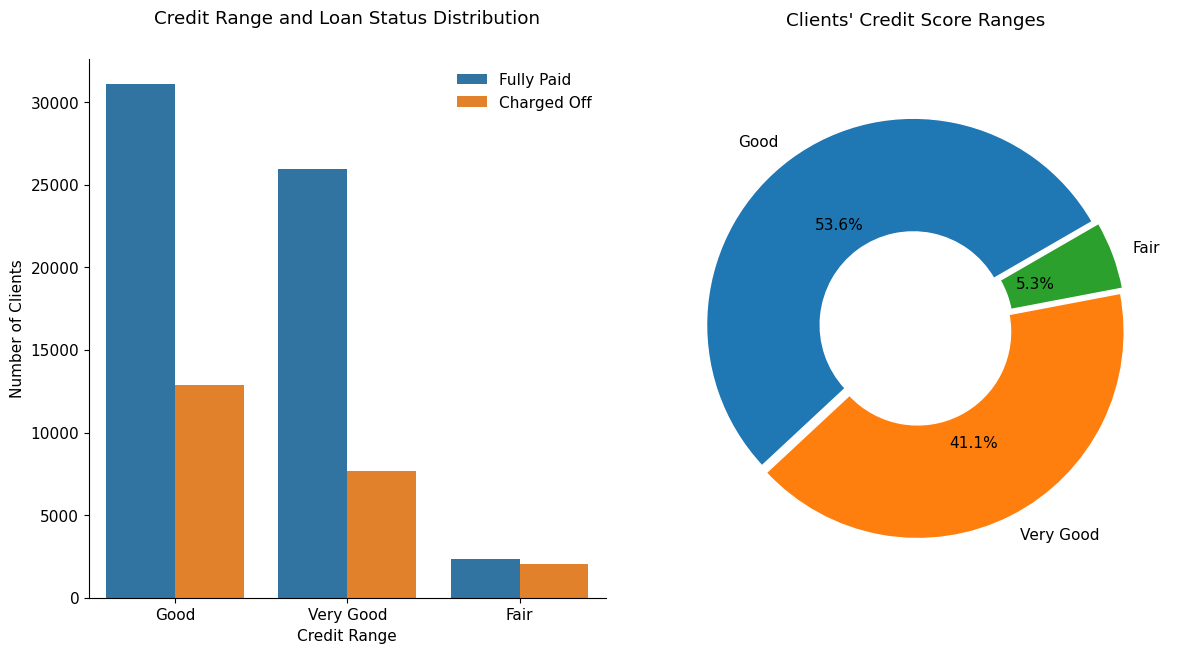

In [38]:
plt.figure(figsize=(1,7))

plt.subplot(121)

sns.countplot(df["Credit_Range"],hue=df["Loan_Status"])
sns.despine(right = True, top = True)
plt.legend().get_frame().set_linewidth(0.0)
plt.xlabel('Credit Range')
plt.ylabel('Number of Clients')
plt.title('Credit Range and Loan Status Distribution', y=1.05)

plt.subplot(122)

df["Credit_Range"].value_counts().plot.pie(autopct = '%1.1f%%',figsize =(14, 7), startangle=30,
                   explode=(0.02,0.02,0.02), wedgeprops=dict(width=0.55, edgecolor='w')) 

plt.title("Clients' Credit Score Ranges", y=1.07)
plt.ylabel('')

plt.subplots_adjust(wspace=0.1)

plt.rc('font', size=12)

plt.show()

**94.7% of the client's credit score ranges are 'Good' or 'Very Good'**, which is a good sign

As expected, the distribution shows that clients with a lower credit range tend to be more likely to not pay their loans, with **close to 50% of those in the 'Fair' range having had their loans charged off**

Inversely, those in the 'Very Good' range mostly fully pay of their loans, with less than 15% of loans having been charged off

### Filling missing values in ['Annual_Income']

In [39]:
print(f"Minimal Annual Income: {df['Annual_Income'].min()}")
print(f"Maximal Annual Income: {df['Annual_Income'].max()}")
print(f"Mean Annual Income: {df['Annual_Income'].mean()}")
print(f"Standard Deviation: {df['Annual_Income'].std()}")
print(f"Number of Missing Values: {df['Annual_Income'].isnull().sum()}")

Minimal Annual Income: 76627.0
Maximal Annual Income: 165557393.0
Mean Annual Income: 1376776.2432428272
Standard Deviation: 1121541.7395114577
Number of Missing Values: 17031


Since the margin between the minimum and maximum in **Annual_Income** is very wide, and since the standard deviation is close to equal to the mean, filling the missing values with the mean or median would skew the data, especially since the number of missing values isn't exactly low 

Instead, I intend to calculate **Annual_Income** by finding the average percentage of **Monthly_Debt** in relation to **Annual Income** across the dataset and calculating **Annual_Income** based on that

In [40]:
print(f"Minimal Monthly Debt: {df['Monthly_Debt'].min()}")
print(f"Maximal Monthly Debt: {df['Monthly_Debt'].max()}")
print(f"Mean Monthly Debt: {df['Monthly_Debt'].mean()}")
print(f"Standard Deviation: {df['Monthly_Debt'].std()}")
print(f"Number of Missing Values: {df['Monthly_Debt'].isnull().sum()}")

Minimal Monthly Debt: 0.0
Maximal Monthly Debt: 435843.28
Mean Monthly Debt: 18330.63310954986
Standard Deviation: 12127.700801152296
Number of Missing Values: 0


In [41]:
valid_income = df.loc[df['Annual_Income'].notnull(), 'Annual_Income']

# Calculating the percentage of ['Monthly_Debt'] in relation to ['Annual_Income']

debt_percentage = (((df['Monthly_Debt'] / valid_income) * 100)).mean()

print(f'Percentage of Monthly Debt to Annual Income: {debt_percentage}')
print(f'Percentage of Monthly Debt to Monthly Income: {debt_percentage * 12}')

Percentage of Monthly Debt to Annual Income: 1.4275876353703407
Percentage of Monthly Debt to Monthly Income: 17.13105162444409


In [42]:
df['Annual_Income'].fillna(value= df['Monthly_Debt'] / (debt_percentage / 100), inplace=True)

all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,81999,0,0.000000,81999
1,Customer_ID,81999,0,0.000000,81999
2,Loan_Status,81999,0,0.000000,81999
3,Current_Loan_Amount,81999,0,0.000000,81999
4,Term,81999,0,0.000000,81999
5,Credit_Score,81999,0,0.000000,81999
6,Credit_Range,81999,0,0.000000,81999
7,Annual_Income,81999,0,0.000000,81999
8,Years_in_current_job,78491,3508,4.278101,81999
9,Home_Ownership,81999,0,0.000000,81999


Filled the missing values in **Annual_Income** by utilising the basic formula of converting a percentage to the full number 

**( Y / P% = X )**:

Y = **Monthly_Debt**

P% = **debt_percentage** / 100

X = **Annual_Income** 

### Dealing with anomalies in ['Purpose']

In [43]:
df['Purpose'].value_counts()

Debt Consolidation      64907
Home Improvements        4795
other                    4604
Other                    2634
Business Loan            1229
Buy a Car                1081
Medical Bills             880
Buy House                 519
Take a Trip               435
major_purchase            303
small_business            230
moving                    116
wedding                    93
Educational Expenses       85
vacation                   80
renewable_energy            8
Name: Purpose, dtype: int64

As we can see, the 3rd and 4th most prevalent columns both include "other", except that one starts with a capitalised "O"

The best choice would be to simply combine them into one by changing the first letter to a capital "O"

In [44]:
df['Purpose'].replace(to_replace='other', value='Other', inplace=True)

df['Purpose'].value_counts().index.tolist()

['Debt Consolidation',
 'Other',
 'Home Improvements',
 'Business Loan',
 'Buy a Car',
 'Medical Bills',
 'Buy House',
 'Take a Trip',
 'major_purchase',
 'small_business',
 'moving',
 'wedding',
 'Educational Expenses',
 'vacation',
 'renewable_energy']

In [45]:
data = df.copy()

data['Purpose'] = pd.Categorical(data['Purpose'], data['Purpose'].value_counts().index.tolist())

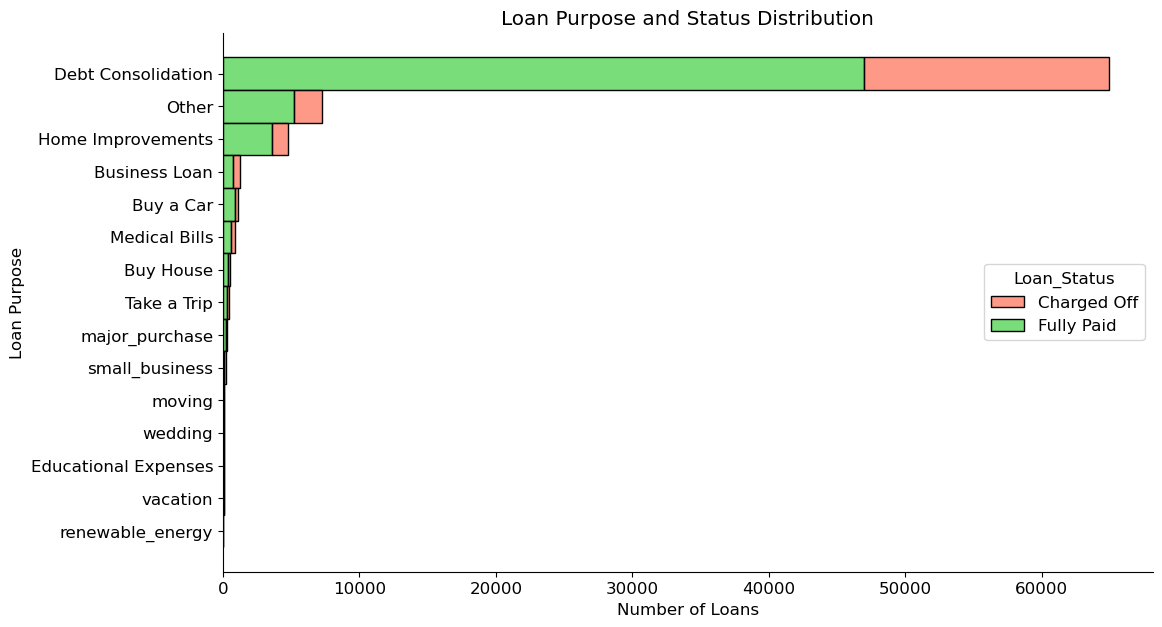

In [46]:
# Creating a copy of the dataset to implement custom order in the ['Purpose'] column
data = df.copy()

# Setting custom order in ['Purpose'] based on their value counts
data['Purpose'] = pd.Categorical(data['Purpose'], data['Purpose'].value_counts().index.tolist())

plt.figure(figsize=(12,7))

ax = sns.histplot(data=data[['Purpose', 'Loan_Status']], multiple="stack",
             y="Purpose", hue="Loan_Status", palette=['tomato','limegreen'],
             hue_order=['Charged Off', 'Fully Paid'], alpha=0.65)

sns.despine(right = True, top = True)
sns.move_legend(ax, "center right")

plt.xlabel('Number of Loans')
plt.ylabel('Loan Purpose')
plt.title('Loan Purpose and Status Distribution')

plt.show()

**Debt Consolidation** is by far the most common loan purpose, with **Other** and **Home Improvements** being the 2nd and 3rd most popular, albeit with a large gap between them and **Debt Consolidation**

Overall, **Business Loans seem to post the most risk**. All the other loan purposes have roughly the same distribution of **Fully Paid & Charged Off loans** (approximately 20-27.5%) 

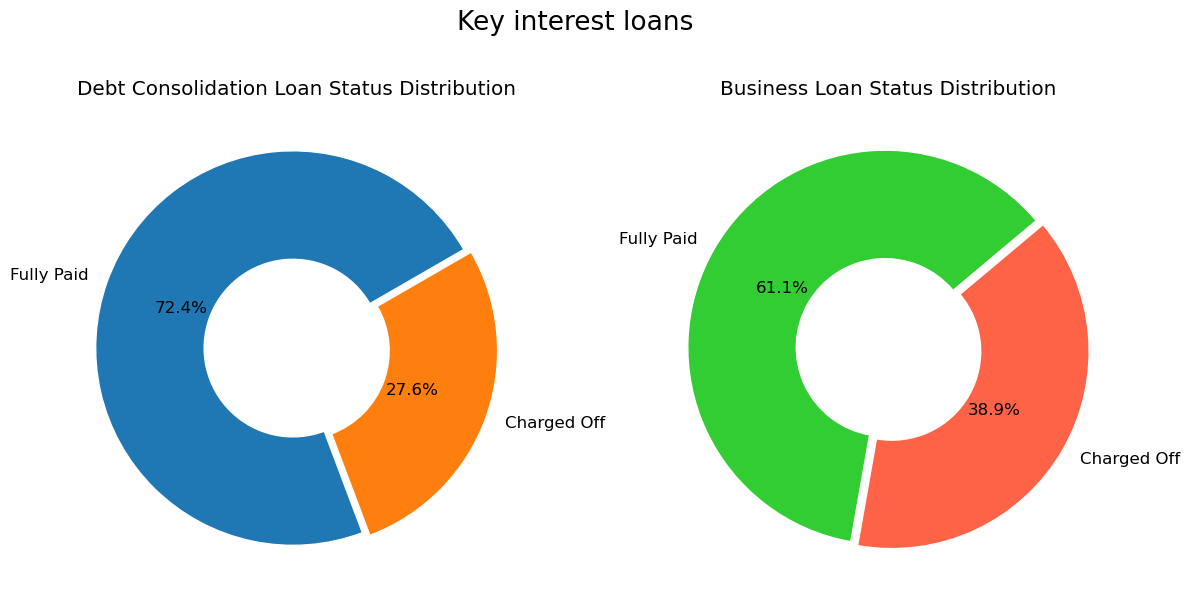

In [47]:
plt.figure(figsize=(12,7))

plt.subplot(121)

df.loc[df['Purpose'] == 'Debt Consolidation', 'Loan_Status'].value_counts().plot.pie(
    autopct = '%1.1f%%',figsize =(14, 7), startangle=30,
    explode=(0.02,0.02), wedgeprops=dict(width=0.55, edgecolor='w')) 

plt.title("Debt Consolidation Loan Status Distribution")
plt.ylabel('')

plt.subplot(122)

df.loc[df['Purpose'] == 'Business Loan', 'Loan_Status'].value_counts().plot.pie(
    autopct = '%1.1f%%',figsize =(14, 7), startangle=40, colors= ['limegreen', 'tomato'],
    explode=(0.02,0.02), wedgeprops=dict(width=0.55, edgecolor='w')) 

plt.title("Business Loan Status Distribution")
plt.ylabel('')

plt.subplots_adjust(wspace=0.2)
plt.suptitle('Key interest loans', fontsize=19)

plt.show()

The 2 most interesting loan purposes are **Debt Consolidation**, due it it being by far the most prominent one, and **Business Loan**, since it poses the most risk compared to all others

We can see that out of the Debt Consolidation loans, **27.6% were charged off**, which is roughly **within the norm** compared to the other ones, so nothing about it stands out 

As for the Business Loans, **38.9% were charged off**, which is alarming. The types of businesses that these loans were given two should, ideally, be investigated, though the needed data is not available within this dataset

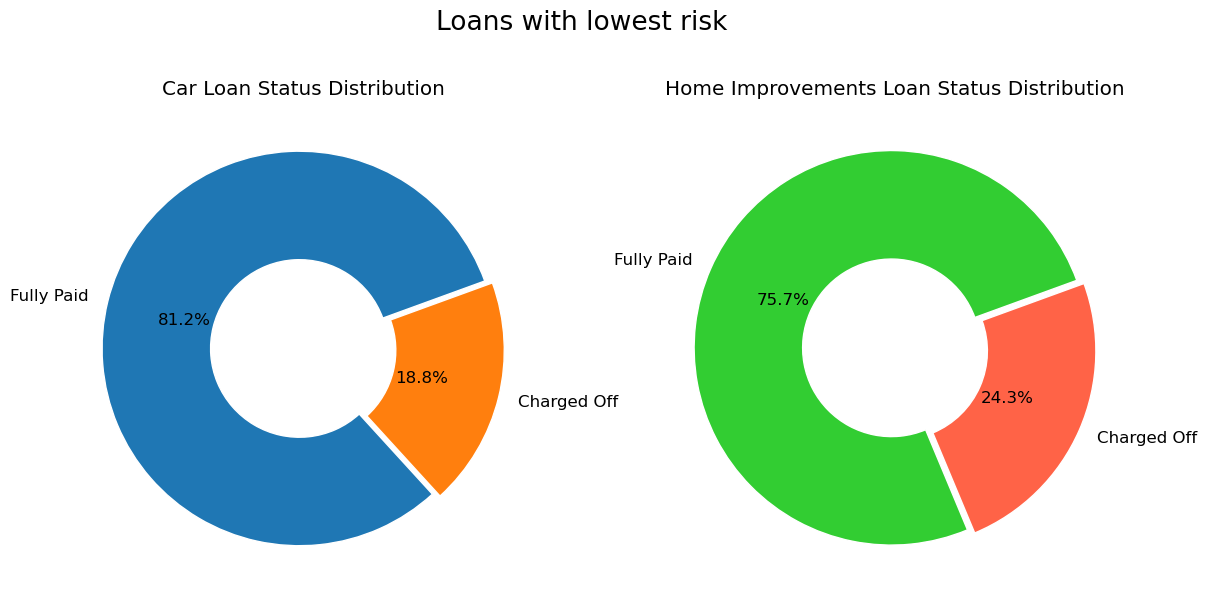

In [48]:
plt.figure(figsize=(12,7))

plt.subplot(121)

df.loc[df['Purpose'] == 'Buy a Car', 'Loan_Status'].value_counts().plot.pie(
    autopct = '%1.1f%%',figsize =(14, 7), startangle=20,
    explode=(0.02,0.02), wedgeprops=dict(width=0.55, edgecolor='w')) 

plt.title("Car Loan Status Distribution")
plt.ylabel('')

plt.subplot(122)

df.loc[df['Purpose'] == 'Home Improvements', 'Loan_Status'].value_counts().plot.pie(
    autopct = '%1.1f%%',figsize =(14, 7), startangle=20, colors= ['limegreen', 'tomato'],
    explode=(0.02,0.02), wedgeprops=dict(width=0.55, edgecolor='w')) 

plt.title("Home Improvements Loan Status Distribution")
plt.ylabel('')

plt.subplots_adjust(wspace=0.2)
plt.suptitle('Loans with lowest risk', fontsize=19)

plt.show()

As for the loans that pose the least risk for the bank, **loans for Buying a Car and for Home Improvements show the most promise**

Although nowhere near as popular as debt consolidation loans, these two have the highest pay off rate, with **less than 25% of home improvement loans being charged off and less than 20% for car loans**

One consideration could be to increase promotion for these 2 loan types to increase their popularity and thus reduce overall risk for the bank, though this hypothesis should be tested on a bigger sample size before coming to any concrete conclusions

### Filling missing values in ['Bankruptcies'] and ['Tax_Liens']

In [49]:
print(f"Number of Bankruptcies: \n\n{df['Bankruptcies'].value_counts()}\n")
print(f"Number of Tax Liens: \n\n{df['Tax_Liens'].value_counts()}")

Number of Bankruptcies: 

0.0    73101
1.0     8296
2.0      329
3.0       72
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

Number of Tax Liens: 

0.0     80491
1.0      1040
2.0       286
3.0        93
4.0        47
5.0        14
6.0         9
7.0         5
9.0         3
11.0        1
15.0        1
10.0        1
Name: Tax_Liens, dtype: int64


Since the overwhelming majority of clients have no bankruptcies or tax liens, I intend to fill the missing values in both columns with the mode of each one, that being **0**


In [50]:
df['Bankruptcies'].fillna(value=0, inplace=True)
df['Tax_Liens'].fillna(value=0, inplace=True)
all_values(df)

,Column,Non_Null_Values,Null_Values,Null_Value_Percentage,Total_Values
0,Loan_ID,81999,0,0.000000,81999
1,Customer_ID,81999,0,0.000000,81999
2,Loan_Status,81999,0,0.000000,81999
3,Current_Loan_Amount,81999,0,0.000000,81999
4,Term,81999,0,0.000000,81999
5,Credit_Score,81999,0,0.000000,81999
6,Credit_Range,81999,0,0.000000,81999
7,Annual_Income,81999,0,0.000000,81999
8,Years_in_current_job,78491,3508,4.278101,81999
9,Home_Ownership,81999,0,0.000000,81999


### Changing ['Years_in_current_job'] to int

In [51]:
df['Years_in_current_job'].value_counts()

10+ years    25271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
9 years       3220
Name: Years_in_current_job, dtype: int64

In [52]:
df['Years_in_current_job'].isnull().sum()

3508

In [53]:
df.loc[(df['Years_in_current_job'].isnull()) | 
       (df['Years_in_current_job'] == '< 1 year' ), 
       'Years_in_current_job'] = '0'

# Extracts only the number, without "years" and any additional symbols
df['Years_in_current_job'] = df['Years_in_current_job'].str.extract('(\d+)')

#Changing type to int64 since it was originally str, allowing it to become a quantative feature for our models
df['Years_in_current_job'] = df['Years_in_current_job'].astype('int64') 

df['Years_in_current_job'].value_counts()

10    25271
0     10263
2      7560
3      6671
5      5619
1      5317
4      5029
6      4702
7      4566
8      3781
9      3220
Name: Years_in_current_job, dtype: int64

The null values in ['Years_in_current_job'] can mean either that the data wasn't provided or that the client is unemployed, potentially even both. Either way, the safest way of dealing with them is by replacing them with **0**, as it covers both cases

Additionally, since ['Years_in_current_job'] takes into account how many **full years** a client has worked at their current job, those that have worked less than 1 year are also replaced with 0

Text(0.5, 1.0, "Distribution of Clients' Years in Current Job")

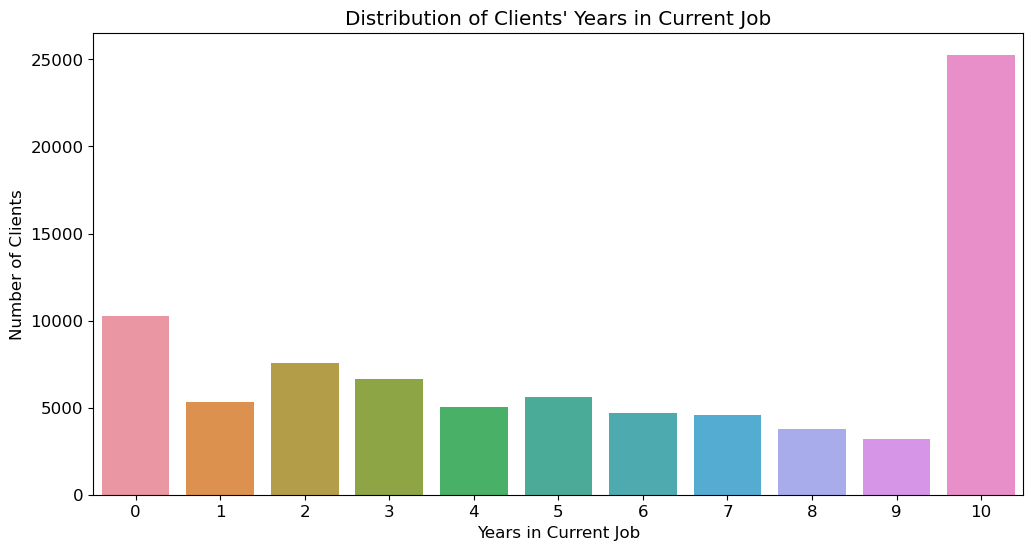

In [54]:
plt.figure(figsize=(12,6))

sns.countplot(df['Years_in_current_job'].sort_values())

plt.xlabel('Years in Current Job')
plt.ylabel('Number of Clients')
plt.title("Distribution of Clients' Years in Current Job")

The overwhelming majority of clients have worked 10 or more years, implying that the bank has a mostly mature clientele, as having spent 10 or more years at a single job immediately eliminates essentially all clients in their 20s and most in their 30s within that category

After that, the second most populated category consists of those with under 1 year at their job, although the difference between this category and the remaining ones isn't significant.

## EDA Summary

From the analysis of the data above, I believe the following to be the key insights:

1 - **Long Term loans pose much more risk than Short Term ones**

2 - **Loans of more than 1 million seem to be the safest**, as there isn't a single case of a Charged Off loan in that category

3 - **Loans between 100K and 350K pose the most risk**

4 - **The majority of loans given by the bank are aimed at Debt Consolidation**, which could pose some issues in the future 

5 - **Almost 40% of Business Loans are Charged Off**, so closer attention needs to be paid regarding the types of businesses the bank if giving loans to

6 - **Home Improvements and Car Loans pose the least risk** based on the given data, so increasing their popularity through promotion or other means could prove beneficial, though a larger sample size is required to prove or disprove this hypothesis before coming to any specific conclusion

# Preprocessing 

### Transforming categorical features

Currently, the **Loan_Status**, **Term**, **Home_Ownership**, and **Purpose** columns are in string format, posing some issues when trying to use them in modeling

To solve this, I will transform them into categorical features using different techniques depending on the feature

In [55]:
print(f"Loan Status: \n\n{df['Loan_Status'].value_counts()}\n\n---\n")
print(f"Term: \n\n{df['Term'].value_counts()}")

Loan Status: 

Fully Paid     59360
Charged Off    22639
Name: Loan_Status, dtype: int64

---

Term: 

Short Term    61387
Long Term     20612
Name: Term, dtype: int64


Since **Loan_Status** and **Term** have only 2 unique values, the obvious choice would be to simply transform them into 1s and 0s through LabelEncoder as it would not cause the model to misinterpret the values as having a particular order or hierarchy

In [56]:
lbl = LabelEncoder()

columns = ['Loan_Status', 'Term']

for i in columns:
    df[i] = lbl.fit_transform(df[i])

print(f"Loan Status: \n\n{df['Loan_Status'].value_counts()}\n\n---\n")
print(f"Term: \n\n{df['Term'].value_counts()}")

Loan Status: 

1    59360
0    22639
Name: Loan_Status, dtype: int64

---

Term: 

1    61387
0    20612
Name: Term, dtype: int64


**Home_Ownership** can also be transformed as despite it being a categorical feature, the categories have a clear hierarchy: Rent < Home Mortgage < Own Home , however, since LabelEncoder might not transform them in this exact order, I will do it manually to ensure that the hierarchy is maintained

The same applies for **Credit_Range**, wherein the hierarchy is Fair < Good < Very Good

Additionally, since **HaveMortgage** is the same as **Home Mortgage** semantically, the former will simply be changed to the latter, hence why it was not included in the hierarchy 

In [57]:
df["Home_Ownership"].replace("HaveMortgage","Home Mortgage",inplace=True)

df['Home_Ownership'].value_counts()

Home Mortgage    40042
Rent             34499
Own Home          7458
Name: Home_Ownership, dtype: int64

In [58]:
ownership = {'Rent' : 0,
             'Home Mortgage' : 1,
             'Own Home' : 2}

df.replace({'Home_Ownership': ownership}, inplace=True)

df['Home_Ownership'].value_counts()

1    40042
0    34499
2     7458
Name: Home_Ownership, dtype: int64

Now for the credit ranges

In [59]:
df['Credit_Range'].value_counts()

Good         43951
Very Good    33667
Fair          4381
Name: Credit_Range, dtype: int64

In [60]:
ranges = {'Fair' : 0,
          'Good' : 1,
          'Very Good' : 2}

df.replace({'Credit_Range': ranges}, inplace=True)

df['Credit_Range'].value_counts()

1    43951
2    33667
0     4381
Name: Credit_Range, dtype: int64

### Checking column correlation

Before transforming ['Purpose'], let's check the correlation of all other columns, as I intend to transform it through the use of get_dummies, which would make a new column for each value in ['Purpose'] and render the correlation heatmap unreadable

I chose get_dummies over OneHotEncoder as no test dataset is used in this project and there is no need to have the values saved in a separate object

<AxesSubplot:title={'center':'Heatmap for correlation'}>

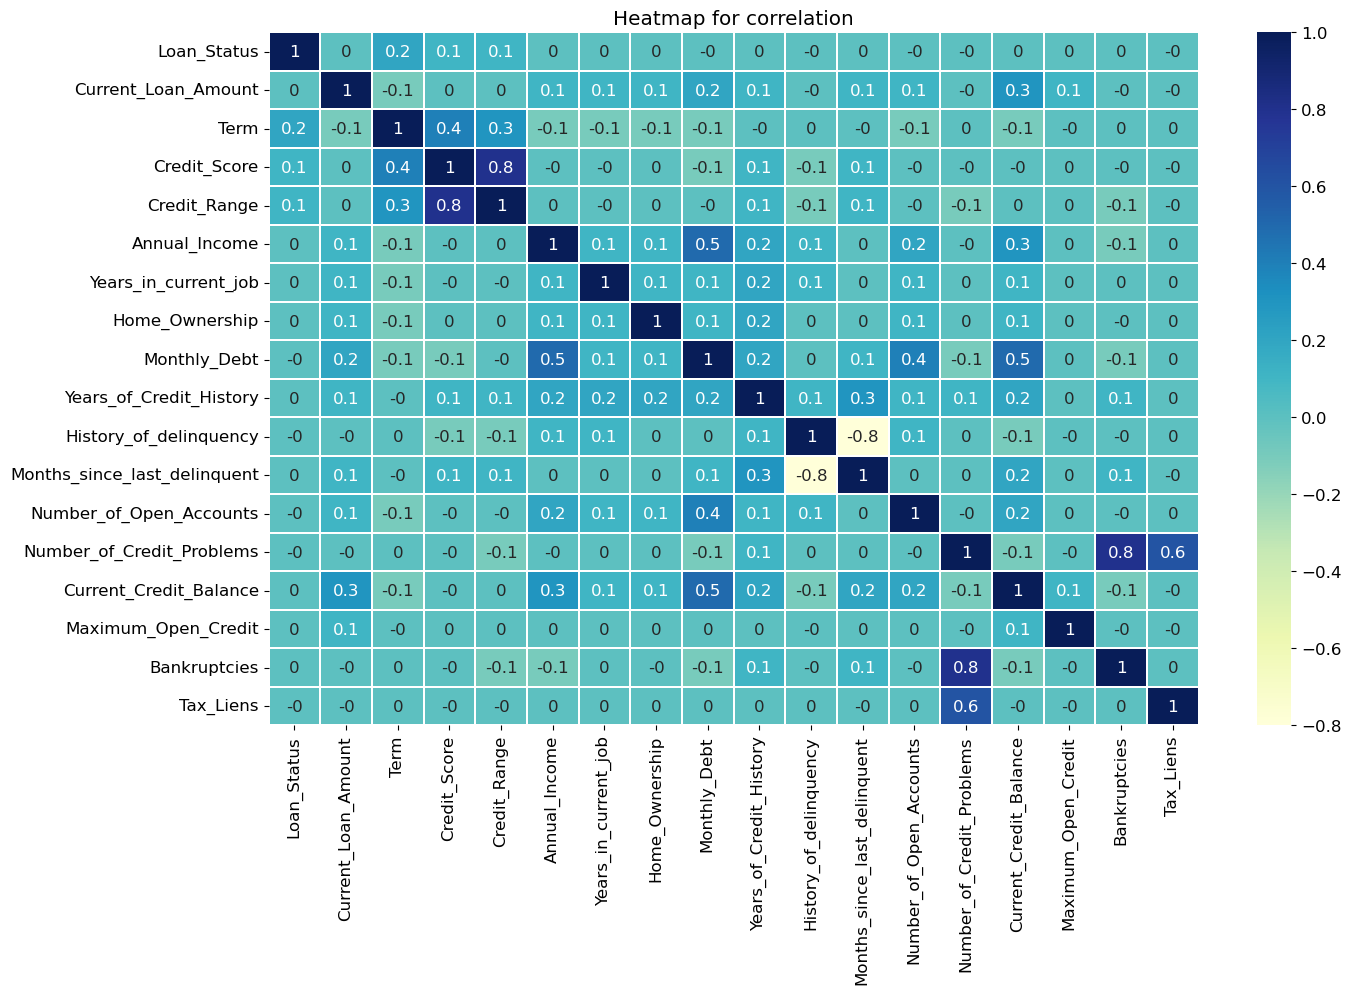

In [61]:
correlation = df.corr()

fig,ax = plt.subplots(figsize=(15,9))
plt.title("Heatmap for correlation")
sns.heatmap(correlation.round(1),cmap='YlGnBu',annot=True,linewidth=0.30,ax=ax)

### Transforming ['Purpose']

In [62]:
df = pd.get_dummies(df, columns=['Purpose'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81999 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       81999 non-null  object 
 1   Customer_ID                   81999 non-null  object 
 2   Loan_Status                   81999 non-null  int64  
 3   Current_Loan_Amount           81999 non-null  float64
 4   Term                          81999 non-null  int64  
 5   Credit_Score                  81999 non-null  float64
 6   Credit_Range                  81999 non-null  int64  
 7   Annual_Income                 81999 non-null  float64
 8   Years_in_current_job          81999 non-null  int64  
 9   Home_Ownership                81999 non-null  int64  
 10  Monthly_Debt                  81999 non-null  float64
 11  Years_of_Credit_History       81999 non-null  float64
 12  History_of_delinquency        81999 non-null  int64  
 13  M

## Preparing data for models

In [63]:
df.drop(columns=['Loan_ID', 'Customer_ID'], inplace=True)

### Dropping outliers 

In [64]:
df = df[(np.abs(stats.zscore(df)) <= 3).all(axis=1)]

df.describe()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Credit_Range,Annual_Income,Years_in_current_job,Home_Ownership,Monthly_Debt,Years_of_Credit_History,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
count,59168.000000,5.916800e+04,59168.000000,59168.000000,59168.000000,5.916800e+04,59168.000000,59168.000000,59168.000000,59168.00000,...,59168.0,59168.0,59168.0,59168.0,59168.0,59168.0,59168.0,59168.0,59168.0,59168.0
mean,0.727555,3.302515e+05,0.752975,729.812246,1.386966,1.273693e+06,5.692029,0.645670,17908.146003,17.82174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.445221,2.321860e+05,0.431285,24.030310,0.550338,6.410049e+05,3.732346,0.632317,9957.219980,6.31134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,4.444000e+03,0.000000,643.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.60000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,1.763740e+05,1.000000,718.000000,1.000000,8.183538e+05,2.000000,0.000000,10626.462500,13.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,2.687300e+05,1.000000,737.000000,1.000000,1.147524e+06,6.000000,1.000000,16280.910000,16.80000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,4.303200e+05,1.000000,748.000000,2.000000,1.591160e+06,10.000000,1.000000,23491.790000,21.40000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,2.246860e+06,1.000000,754.000000,2.000000,4.563230e+06,10.000000,2.000000,54684.090000,39.40000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The criteria I have chosen for determining and dropping outliers is the Z-score, with the remaining values all falling in the range of (-3,3) in terms of Z-score 

I chose this so that there is still a fair amount of variation in the data and so that it doesn't become too homogenous 

Note:

**Z-score = the number of standard deviations a value is bigger or smaller than the mean**

### Creating the train/test split

In [65]:
X = df.drop(['Loan_Status'], axis=1).values
y = df['Loan_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state= 42)

print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (47334, 32)
X_test:  (11834, 32)
y_train: (47334,)
y_test:  (11834,)


# Fitting and testing the models

Note: Scaling the data proved to be detrimental to the models' performance regardless of the scaler used, so I decided not to scale the data and proceed simply with the cleaned dataset

### Creating functions to simplify modeling

In [66]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracy.mean()


def conf_mtrx(model):
    
    y_pred = model.predict(X_test)
    
    # Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(cm).plot()
    plt.show()

## Logistic Regression

Accuracy: 0.7270672279351912


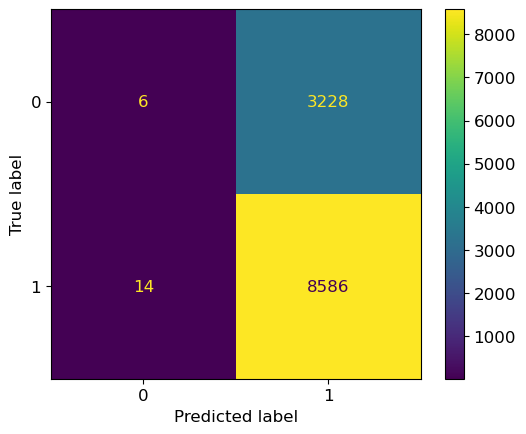

In [67]:
lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

print(f'Accuracy: {cross_val(X_train, y_train, lr)}')

conf_mtrx(lr)

Overall, Logistic Regression has a decent score (though nothing too impressive), however, upon closer inspection we can see that it assigns 1 (Fully Paid) to practically all of its predictions, leading to many false positives and meaning that the model has a strong bias towards 1s

After comparing the results with the other models, if the bias issue remains across the others, some alterations to the data will have to be made

## KNN (K Nearest Neighbors) 

Accuracy: 0.7260954088496853


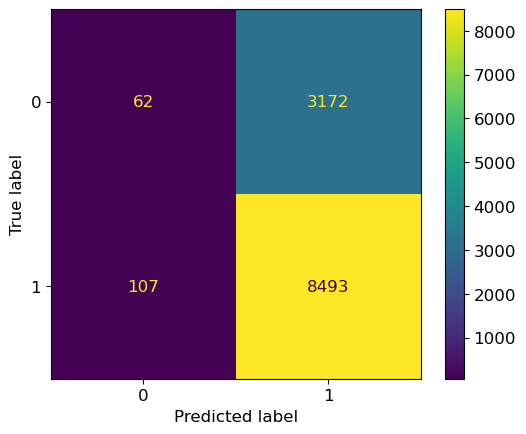

In [68]:
knn = KNeighborsClassifier(n_neighbors=43)

knn.fit(X_train, y_train)

print(f'Accuracy: {cross_val(X_train, y_train, knn)}')

conf_mtrx(knn)

The KNN model is, roughly speaking, performing the same as Logistic Regression, though with a very slightly wider distribution across its prediction, though the issue of predictions being highly biased towards 1s (Fully Paid) still remains

## Random Forest Classifier

Accuracy: 0.7278066496782187


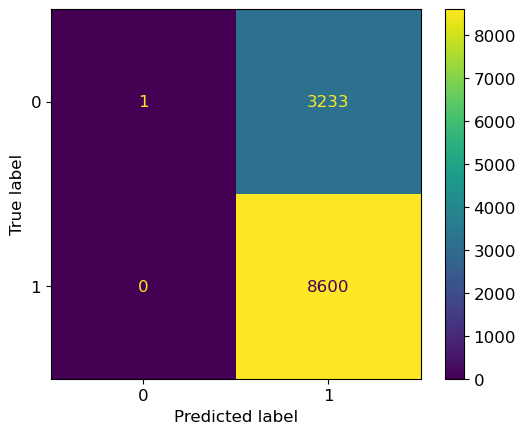

In [69]:
rfc = RandomForestClassifier(max_features=6,max_depth=5, random_state=42)

rfc.fit(X_train, y_train)

print(f'Accuracy: {cross_val(X_train, y_train, rfc)}')

conf_mtrx(rfc)

Even bigger issues with bias in Random Forest Classifier, as this time, every single prediction was a 1

## Gaussian Naive Bayes

Accuracy: 0.7222291603260904


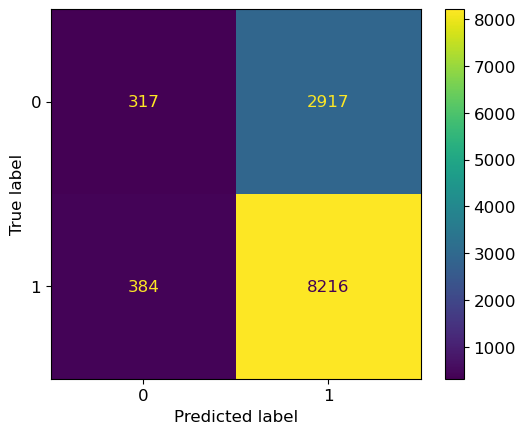

In [70]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

print(f'Accuracy: {cross_val(X_train, y_train, gnb)}')

conf_mtrx(gnb)

While the score is the lowest among the models tried so far, the Gaussian Naive Bayes model shows **far less bias** than the other models

The best candidate for future tuning so far, unless Decision Tree Classifier shows better results

## Decision Tree

Accuracy: 0.6384627946095672


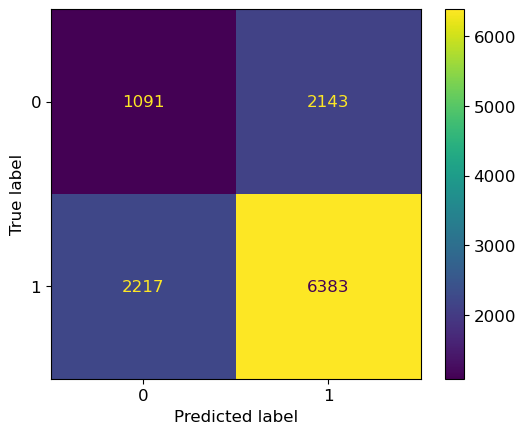

In [71]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

dtc.fit(X_train, y_train)

print(f'Accuracy: {cross_val(X_train, y_train, dtc)}')

conf_mtrx(dtc)

Decision Tree Classifier has by far the least bias out of all of the models, however, its accuracy is severely lacking so far

After transforming the data, I will try both the Decision Tree Classifier and Gaussian Naive Bayes models on the transformed data to see whether there were any improvements

# Dealing with Oversampling 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

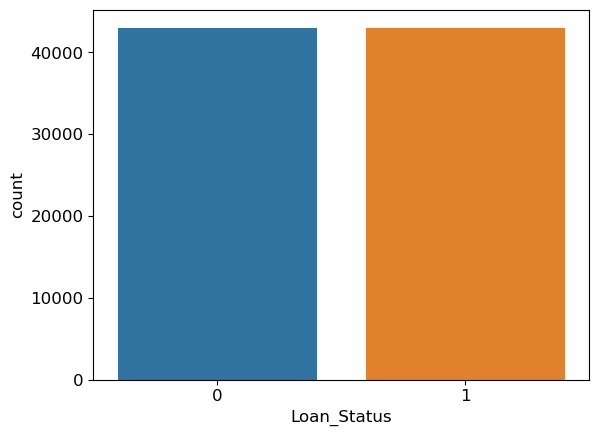

In [72]:
over_sampler = RandomOverSampler(sampling_strategy="minority")
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
counter = 0
sampled_df = pd.DataFrame()
for i in list(df.columns)[1:]:
    sampled_df[i] = X_oversampled[i]
    counter += 1
    
sampled_df["Loan_Status"] = Y_oversampled
sampled_df = sampled_df.copy()

sns.countplot(sampled_df["Loan_Status"])

To deal with the issues of oversampling (there were many more instances of 1s than 0s in ['Loan_Status']) I chose to use Random Over Sampler, which creates duplicate values from the underpopulated class (0s) and fills the dataset with them in order to create an even distribution of classes

In [73]:
X = sampled_df.drop(['Loan_Status'], axis=1).values
y = sampled_df['Loan_Status'].values

smpl_X_train, smpl_X_test, smpl_y_train, smpl_y_test = train_test_split(X,y, test_size=0.2,random_state= 42)

print(f'X_train: {smpl_X_train.shape}')
print(f'X_test:  {smpl_X_test.shape}')
print(f'y_train: {smpl_y_train.shape}')
print(f'y_test:  {smpl_y_test.shape}')

X_train: (68876, 32)
X_test:  (17220, 32)
y_train: (68876,)
y_test:  (17220,)


## Testing Gaussian Naive Bayes and Decision Tree Classifier without oversampling

Accuracy: 0.5425546751656265


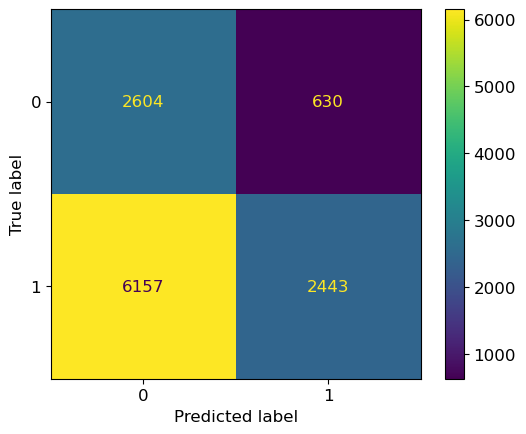

In [74]:
smpl_gnb = GaussianNB()

smpl_gnb.fit(smpl_X_train, smpl_y_train)

print(f'Accuracy: {cross_val(smpl_X_train, smpl_y_train, smpl_gnb)}')

conf_mtrx(smpl_gnb)

The bias issue was fixed through removing oversampling from the data, which is a good sign

However, despite showing promise in the initial modelling stage, the Gaussian Naive Bayes model's **accuracy suffered greatly** when given an equal distribution of the target feature ('Loan_Status')

Accuracy: 0.7869794787641938


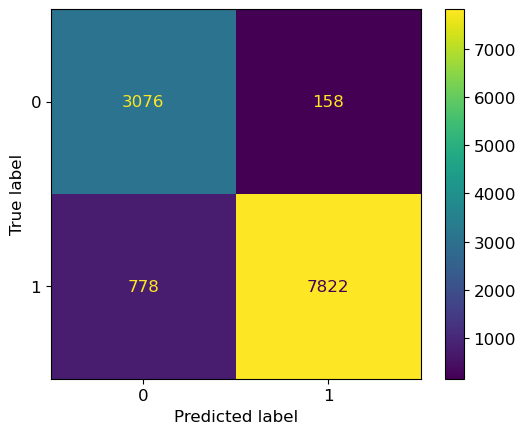

In [75]:
smpl_dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)

smpl_dtc.fit(smpl_X_train, smpl_y_train)

print(f'Accuracy: {cross_val(smpl_X_train, smpl_y_train, smpl_dtc)}')

conf_mtrx(smpl_dtc)

On the other hand, Decision Tree Classifier's accuracy improved tremendously after removing oversampling, so I will proceed with tuning this model from this point on in an attempt to improve the score even further

To me, this was an unexpected turn of events, as the model did not have any problems with bias to begin with, yet shows an incredible increase in accuracy

Additionally, **the majority of prediction errors are in False Negatives** (lower left square), which is better than if it were in the False Positives (upper right square), as **False Negatives would only lead to unrealised gains** while **False Positives lead to actual losses**

In [76]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 30),
              "min_samples_leaf": randint(1, 20),
              "criterion": ['entropy', 'gini']}

new_dtc = DecisionTreeClassifier()

cv_dtc = RandomizedSearchCV(new_dtc, param_dist, cv=15, random_state=42)

cv_dtc.fit(smpl_X_train, smpl_y_train)

print("Tuned Decision Tree Parameters: {}".format(cv_dtc.best_params_))
print("Best score is {}".format(cv_dtc.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 21, 'min_samples_leaf': 1}
Best score is 0.8082206488430757


Accuracy: 0.7856583120964734


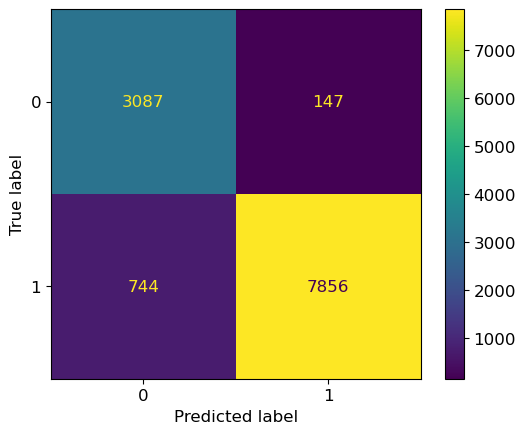

In [77]:
tuned_dtc = DecisionTreeClassifier(criterion='gini', max_features= 21, min_samples_leaf= 1, random_state=42)

tuned_dtc.fit(smpl_X_train, smpl_y_train)

print(f'Accuracy: {cross_val(smpl_X_train, smpl_y_train, tuned_dtc)}')

conf_mtrx(tuned_dtc)

Despite the overall accuracy score being lower by a miniscule amount compared to the previous version, the confusion matrix has also improved  a little bit 

Note:

The accuracy score was the mean of several scores as a result of cross validation, however, all of them were within the same random_state, hence, different data would result in different scoring, so the version with tuned hyperparameters will be the final one as it was checked through more expansive testing